# Plots for T3100

In [40]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import numpy as np
import seaborn as sb

sb.set()
sb.set_palette(['#0D5265', '#7FF9E2', '#7630EA', '#C140FF', '#FF8300', '#FEC901'])
sb.set_style('ticks')
sb.set_context('paper', rc={'lines.linewidth': .2})

In [41]:
def arrowed_spines(
        ax,
        x_width_fraction=0.02,
        x_height_fraction=0.02,
        lw=1,
        ohg=0,
        locations=('bottom right', 'left up'),
        **arrow_kwargs
):
    """
    Add arrows to the requested spines
    Code originally sourced here: https://3diagramsperpage.wordpress.com/2014/05/25/arrowheads-for-axis-in-matplotlib/
    And interpreted here by @Julien Spronck: https://stackoverflow.com/a/33738359/1474448
    Then corrected and adapted by https://stackoverflow.com/a/56972259 for more general applications.
    :param ax: The axis being modified
    :param x_{height,width}_fraction: The fraction of the **x** axis range used for the arrow height and width
    :param lw: Linewidth. If not supplied, default behaviour is to use the value on the current left spine.
    :param ohg: Overhang fraction for the arrow.
    :param locations: Iterable of strings, each of which has the format "<spine> <direction>". These must be orthogonal
    (e.g. "left left" will result in an error). Can specify as many valid strings as required.
    :param arrow_kwargs: Passed to ax.arrow()
    :return: Dictionary of FancyArrow objects, keyed by the location strings.
    """
    # set/override some default plotting parameters if required
    arrow_kwargs.setdefault('overhang', ohg)
    arrow_kwargs.setdefault('clip_on', False)
    arrow_kwargs.update({'length_includes_head': True})

    # axis line width
    if lw is None:
        # FIXME: does this still work if the left spine has been deleted?
        lw = ax.spines['left'].get_linewidth()

    annots = {}

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    # get width and height of axes object to compute
    # matching arrowhead length and width
    fig = ax.get_figure()
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = x_width_fraction * (ymax-ymin)
    hl = x_height_fraction * (xmax-xmin)
    hw = .11
    hl = .18

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    for loc_str in locations:
        side, direction = loc_str.split(' ')
        assert side in {'top', 'bottom', 'left', 'right'}, "Unsupported side"
        assert direction in {'up', 'down', 'left', 'right'}, "Unsupported direction"

        if side in {'bottom', 'top'}:
            if direction in {'up', 'down'}:
                raise ValueError("Only left/right arrows supported on the bottom and top")

            dy = 0
            head_width = hw
            head_length = hl

            y = ymin if side == 'bottom' else ymax+100

            if direction == 'right':
                x = xmin
                dx = xmax - xmin
            else:
                x = xmax
                dx = xmin - xmax

        else:
            if direction in {'left', 'right'}:
                raise ValueError("Only up/downarrows supported on the left and right")
            dx = 0
            head_width = yhw
            head_length = yhl

            x = xmin if side == 'left' else xmax

            if direction == 'up':
                y = ymin
                dy = ymax - ymin
            else:
                y = ymax
                dy = ymin - ymax


        annots[loc_str] = ax.arrow(x, y, dx, dy, fc='k', ec='k', lw = lw,
                 head_width=head_width, head_length=head_length, **arrow_kwargs)

    return annots

## Outlier Types

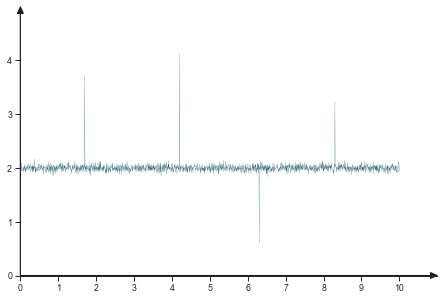

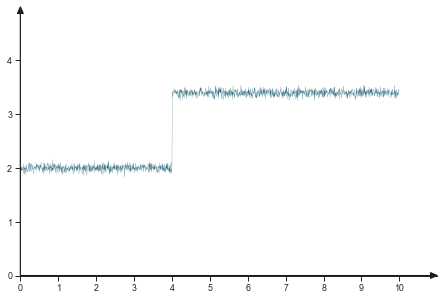

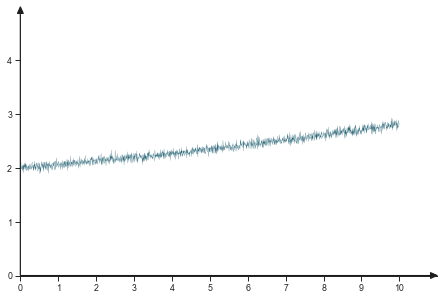

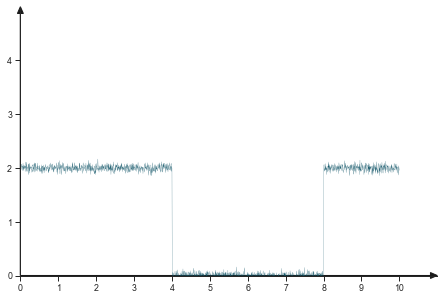

In [93]:
def plot_outlier_types(f, name):
    plt.figure()
    x = np.arange(0, 10, 0.005)
    y = 2 + 0.05*np.random.randn(len(x), 1).squeeze() +  + np.array([f(_x) for _x in x])

    plt.plot(x, y)
    plt.xlim([0, 11])
    plt.ylim([0, 5])
    plt.xticks(np.arange(0, 11))
    plt.yticks(np.arange(0, 5))
    arrowed_spines(plt.gca())
    sb.despine()
    plt.tight_layout(0.1)
    
    plt.savefig(f'images/plot_outlier_{name}.pdf')

def spike(x):
    if x == 1.7:
        return 1.8
    elif x == 4.2:
        return 2.1
    elif x == 6.3:
        return -1.4
    elif x == 8.3:
        return 1.3
    else:
        return 0
plot_outlier_types(spike, 'spike')

plot_outlier_types(lambda x: 1.4 if x > 4 else 0, 'levelshift')

def drift(x):
    x_start = 0
    if x < x_start:
        return 0
    else:
        return np.exp(0.06*(x - x_start))-1
plot_outlier_types(drift, 'drift')

plot_outlier_types(lambda x: -2 if x > 4 and x < 8 else 0, 'null')
